# Predicting Prices Of Used Cars

I have worked with the given data ad have made models to predict the prices of the used cars.
The following steps were used:
* Data Cleaning and Preprocessing
* Exploratory Data Analysis
* Data Splitting
* Machine Learning Models
* Submitting The Model

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
import pydotplus
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn import tree
from sklearn.metrics import mean_squared_error


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


In [0]:
data_train = pd.read_excel('Data_Train.xlsx')
data_test =  pd.read_pickle('data_test_after_cleaning.pkl')

In [4]:
data_train.columns

Index(['Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats',
       'Price'],
      dtype='object')

In [6]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6019 non-null   object 
 1   Location           6019 non-null   object 
 2   Year               6019 non-null   int64  
 3   Kilometers_Driven  6019 non-null   int64  
 4   Fuel_Type          6019 non-null   object 
 5   Transmission       6019 non-null   object 
 6   Owner_Type         6019 non-null   object 
 7   Mileage            6017 non-null   object 
 8   Engine             5983 non-null   object 
 9   Power              5983 non-null   object 
 10  Seats              5977 non-null   float64
 11  Price              6019 non-null   float64
dtypes: float64(2), int64(2), object(8)
memory usage: 564.4+ KB


In [7]:
data_train.head(5)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74


In [8]:
data_test.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Brand,Model
0,Maruti Alto K10 LXI CNG,Delhi,2014,40929,CNG,Manual,First,32.26,998.0,58.20000,4.0,maruti,alto
1,Maruti Alto 800 2016-2019 LXI,Coimbatore,2013,54493,Petrol,Manual,Second,24.7,796.0,47.30000,5.0,maruti,alto
2,Toyota Innova Crysta Touring Sport 2.4 MT,Mumbai,2017,34000,Diesel,Manual,First,13.68,2393.0,147.80000,7.0,toyota,innova
3,Toyota Etios Liva GD,Hyderabad,2012,139000,Diesel,Manual,First,23.59,1364.0,110.38042,5.0,toyota,etios
4,Hyundai i20 Magna,Mumbai,2014,29000,Petrol,Manual,First,18.5,1197.0,82.85000,5.0,hyundai,i20


In [0]:
brand_name=[]
model_name=[]
for index, rows in data_train.iterrows():
    brand_name.append(rows['Name'].split()[0].lower())
    model_name.append(rows['Name'].split()[1].lower())

In [0]:
data_train['Brand']= brand_name
data_train['Model']= model_name

In [0]:
data_train["Power"] = data_train["Power"].str.split(" ", expand = True)
data_train["Mileage"] = data_train["Mileage"].str.split(" ", expand = True)
data_train["Engine"] = data_train["Engine"].str.split(" ", expand = True)

In [13]:
data_train.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand,Model
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6,998,58.16,5.0,1.75,maruti,wagon
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582,126.2,5.0,12.50,hyundai,creta
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2,1199,88.7,5.0,4.50,honda,jazz
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248,88.76,7.0,6.00,maruti,ertiga
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2,1968,140.8,5.0,17.74,audi,a4


Text(0, 0.5, 'Number of cars')

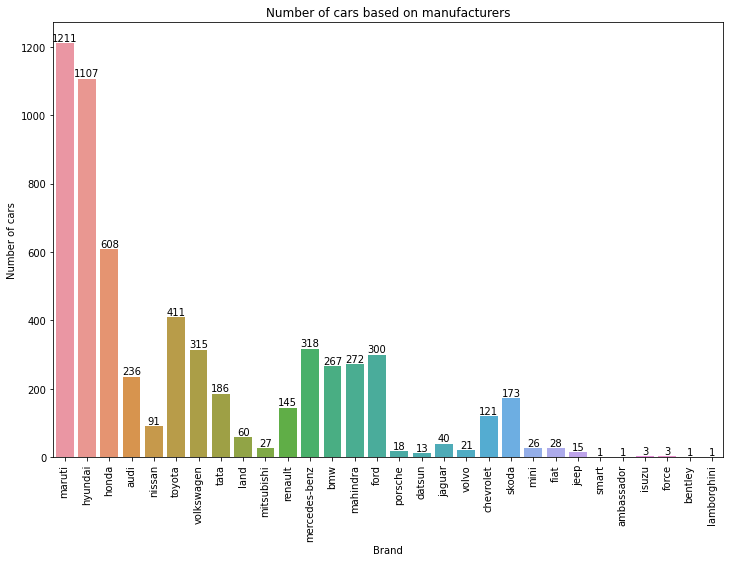

In [14]:
plt.figure(figsize = (12, 8))
plot = sns.countplot(x = 'Brand', data = data_train)
plt.xticks(rotation = 90)
for p in plot.patches:
    plot.annotate(p.get_height(), 
                        (p.get_x() + p.get_width() / 2.0, 
                         p.get_height()), 
                        ha = 'center', 
                        va = 'center', 
                        xytext = (0, 5),
                        textcoords = 'offset points')

plt.title("Number of cars based on manufacturers")
plt.xlabel("Brand")
plt.ylabel("Number of cars")

# Removing Null values

We will be cleaning and processing the data by removing the null values and replacing it with the mean of the column.

In [15]:
data_train.isnull().sum()

Name                  0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               2
Engine               36
Power                36
Seats                42
Price                 0
Brand                 0
Model                 0
dtype: int64

In [17]:
data_train[data_train['Mileage'].isnull()]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand,Model


In [0]:
mileage_train = data_train["Mileage"].str.split(" ", expand = True)
data_train["Mileage"] = pd.to_numeric(mileage_train[0], errors = 'coerce')

data_train["Mileage"].fillna(data_train["Mileage"].astype("float64").mean(), inplace = True)

In [18]:
data_train.isnull().sum()


Name                  0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               0
Engine               36
Power                36
Seats                42
Price                 0
Brand                 0
Model                 0
dtype: int64

In [0]:
Engine_train = data_train["Engine"].str.split(" ", expand = True)
data_train["Engine"] = pd.to_numeric(Engine_train[0], errors = 'coerce')
data_train["Engine"].fillna(data_train["Engine"].astype("float64").mean(), inplace = True)

In [20]:
data_train.isnull().sum()

Name                  0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               0
Engine                0
Power                36
Seats                42
Price                 0
Brand                 0
Model                 0
dtype: int64

In [0]:
Power_train = data_train["Power"].str.split(" ", expand = True)
data_train["Power"] = pd.to_numeric(Power_train[0], errors = 'coerce')
data_train["Power"].fillna(data_train["Power"].astype("float64").mean(), inplace = True)

In [22]:
data_train.isnull().sum()

Name                  0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               0
Engine                0
Power                 0
Seats                42
Price                 0
Brand                 0
Model                 0
dtype: int64

In [0]:
data_train["Seats"].fillna(data_train["Seats"].astype("float64").mean(), inplace = True)

In [24]:
data_train.isnull().sum()

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
Brand                0
Model                0
dtype: int64

# Removing Outliers from the Data Given 

In [25]:
def get_numerical_features(dataset):
    df = dataset
    df_numerics_only = df.select_dtypes(include=np.number)
  
    colnames_numerics_only = df.select_dtypes(include=np.number).columns.tolist()
    
    return colnames_numerics_only

df_train = get_numerical_features(data_train)
print(df_train)

df_test = get_numerical_features(data_test)
print(df_test)

print(data_train.shape)

remove_train_outliers_list = df_train
remove_test_outliers_list = df_test

def remove_outliers(dataset , remove_outliers_list):
    
    for i in range(len(remove_outliers_list)):
       
        dataset.drop(dataset[dataset[remove_outliers_list[i]] >=( 0.99999 * dataset[remove_outliers_list[i]].max()) ].index, inplace = True )

remove_outliers(data_train , remove_train_outliers_list)
remove_outliers(data_test , remove_test_outliers_list)

print(data_train.shape)

['Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats', 'Price']
['Year', 'Kilometers_Driven', 'Engine', 'Power', 'Seats']
(6019, 14)
(5903, 14)


# Exploratory data Analysis

We will now begin analysing the data given to us.

#### Distribution Plots:
In this section, I assess how the "numeric/continuous" independent variables are distributed. I also inspect the frequencies for my categorical variables.

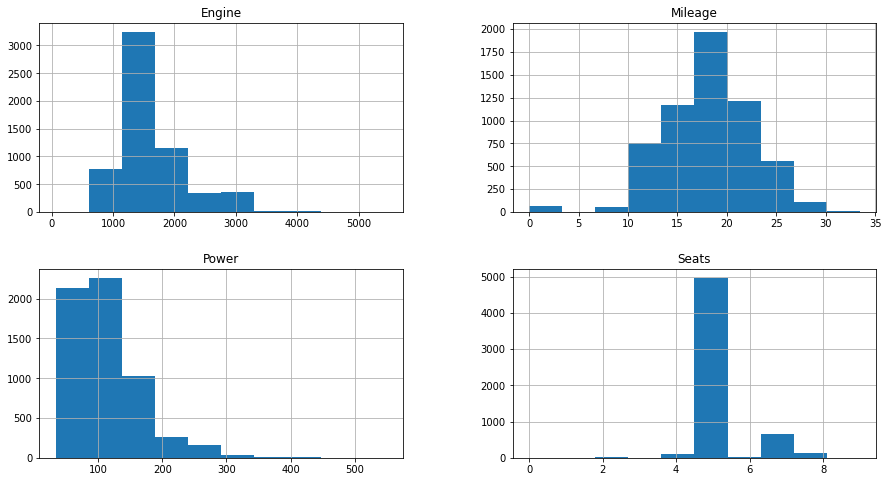

In [26]:
# Univariate visualisation for quantative features
features = ['Mileage', 'Engine','Power','Seats']
data_train[features].hist(figsize=(15, 8));

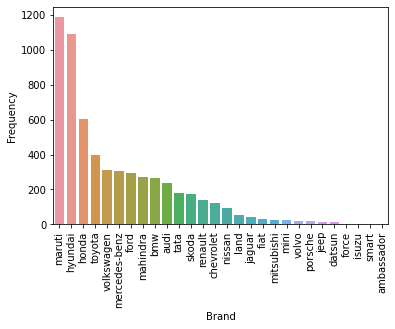

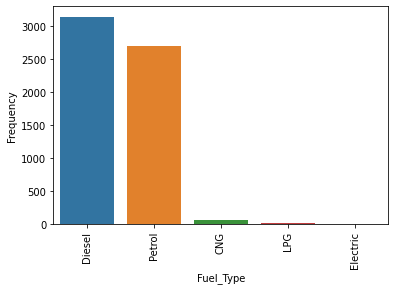

In [27]:
categories = ['Brand','Fuel_Type'] # categorical features used in my analysis
ranges = [0,1,2,3,4] 
counts = []
x = []
y = []
for i,j in zip(ranges,categories):
    z = data_train.groupby([j])['Year'].count().sort_values(ascending=False).reset_index()
    counts.append(z)
    x.append(counts[i][j])
    y.append(counts[i]['Year'])
    plt.figure()
    sns.barplot(x[i],y[i])
    plt.ylabel('Frequency')
    plt.xticks(rotation=90)

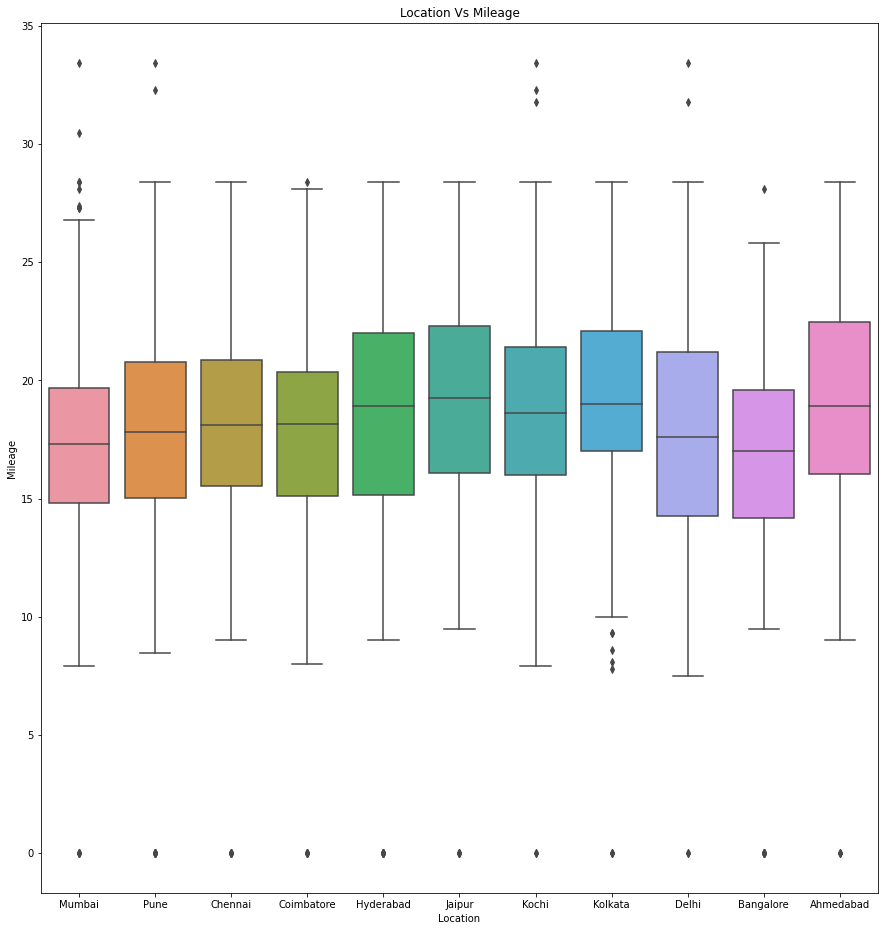

In [28]:
#multivariate visualisation for 2 variables Location and mileage
plt.figure(figsize=(15,16))
plt.title("Location Vs Mileage")
sns.boxplot(x = 'Location', y = 'Mileage', data = data_train) 

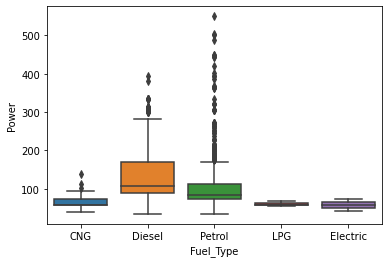

In [29]:
sns.boxplot(x = 'Fuel_Type', y = 'Power', data = data_train) 

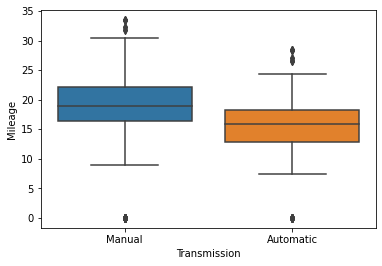

In [30]:
sns.boxplot(x = 'Transmission', y = 'Mileage', data = data_train) 

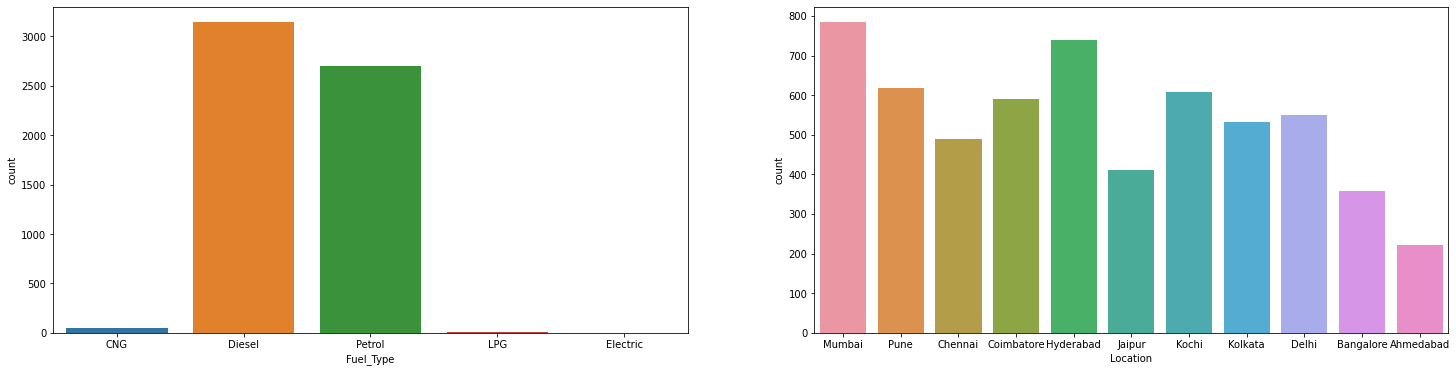

In [31]:
_, axes = plt.subplots(nrows=1, ncols=2, figsize=(25, 6))
sns.countplot(x='Fuel_Type', data=data_train, ax=axes[0]);
sns.countplot(x='Location', data=data_train, ax=axes[1]);

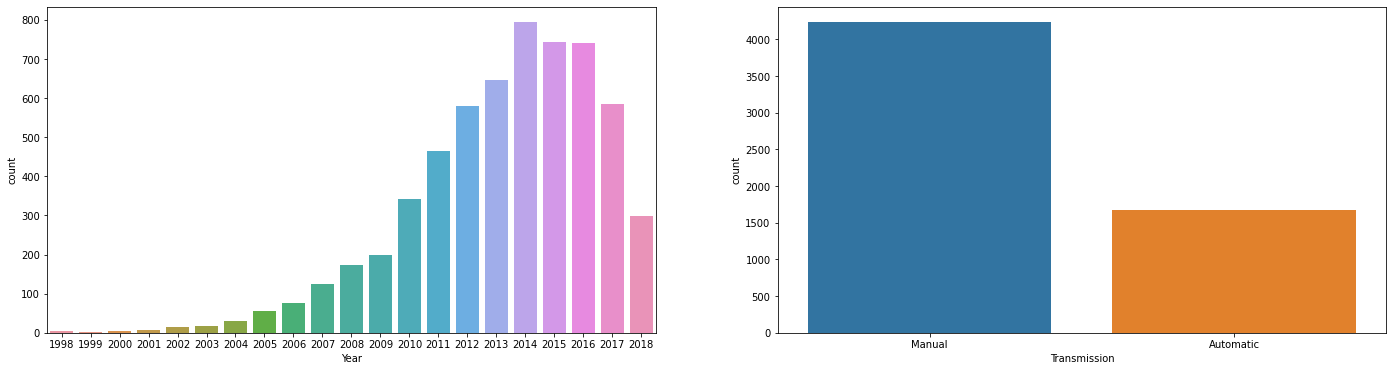

In [32]:
_, axes = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))
sns.countplot(x='Year', data=data_train, ax=axes[0]);
sns.countplot(x='Transmission', data=data_train, ax=axes[1]);

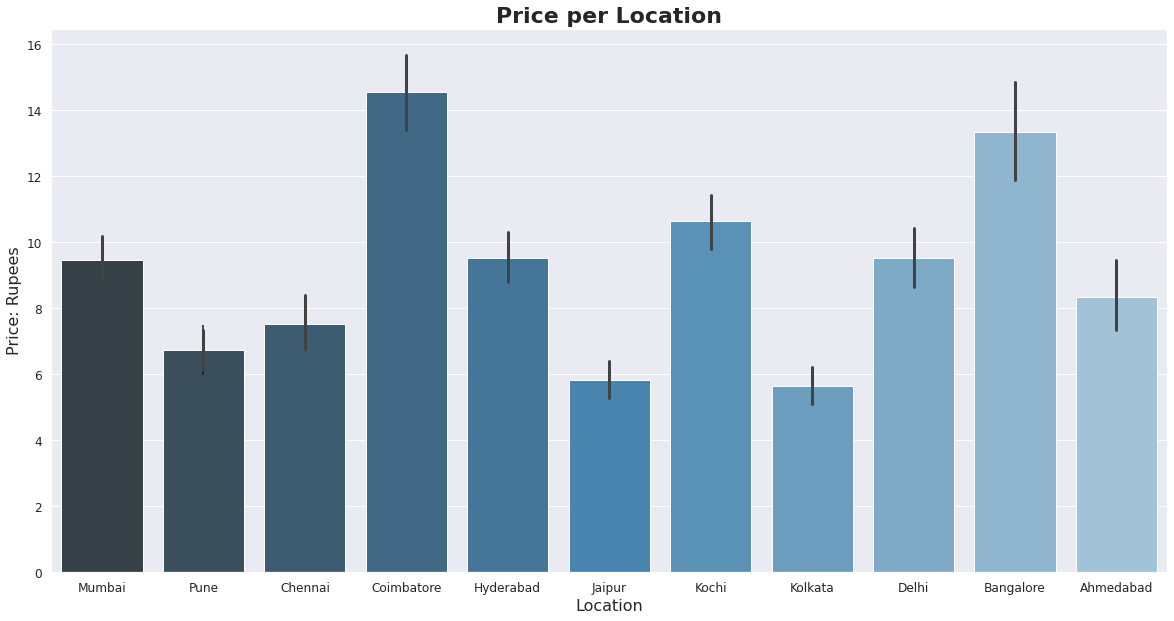

In [33]:
sem_price = data_train.groupby(['Location'])['Price'].sem().reset_index()
plt.figure(figsize=(20, 10));
sns.set_style("ticks", {"xtick.major.size": 16, "ytick.major.size":8});
sns.set(font_scale=1.1)
fig = sns.barplot(x=data_train['Location'],y= data_train['Price'],yerr=sem_price['Price'],errwidth=3,palette="Blues_d")
plt.ylabel('Price: Rupees',fontsize=16);
plt.xlabel('Location',fontsize=16);
plt.xticks()
plt.title('Price per Location',fontsize=22,fontweight='bold');

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3672: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


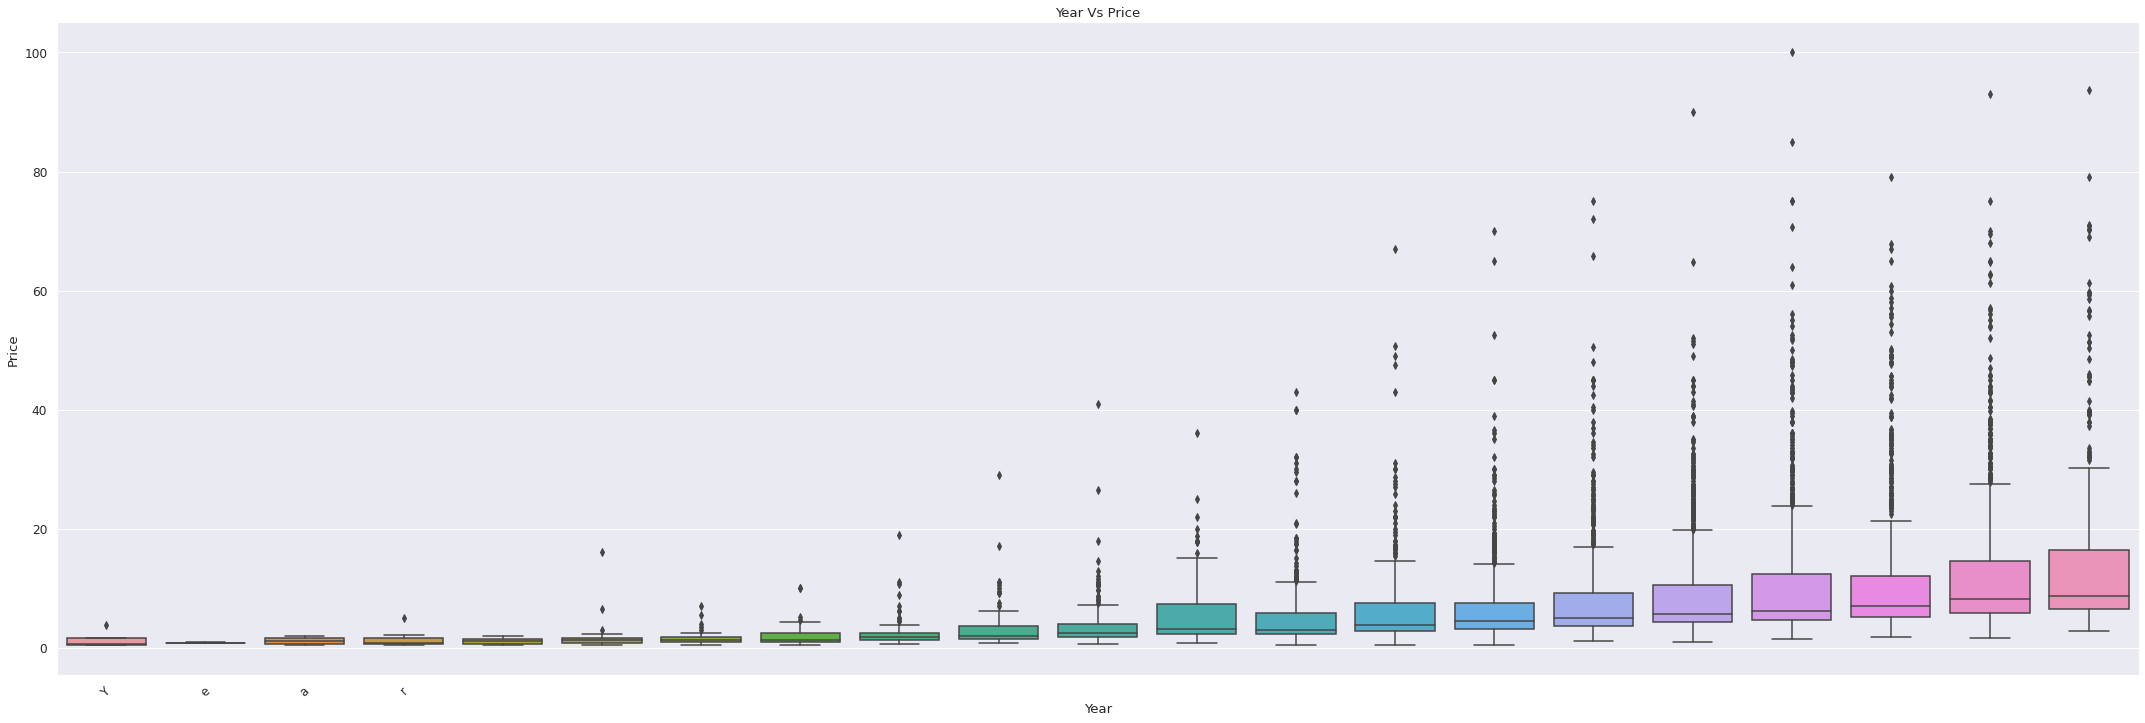

In [34]:
mx = sns.factorplot(x="Year", y="Price", data=data_train, kind="box", size=10 ,aspect=3)
mx.set(xlabel= 'Year')
mx.set_xticklabels('Year',rotation=45)
mx.set(ylabel= 'Price')
plt.title('Year Vs Price');
plt.show()

<Figure size 2880x720 with 0 Axes>

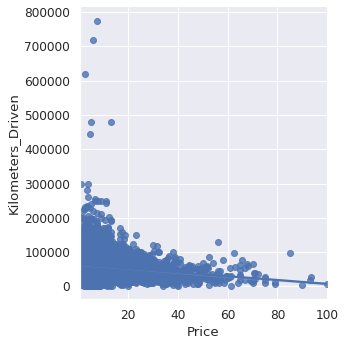

In [35]:
plt.figure(figsize=(40,10))
sns.lmplot(y='Kilometers_Driven',x='Price',data=data_train,fit_reg=True);

In [0]:
data_train['Kilometers_Driven'] =data_train['Kilometers_Driven'].apply(lambda x: 650000 if x>6000000 else x)

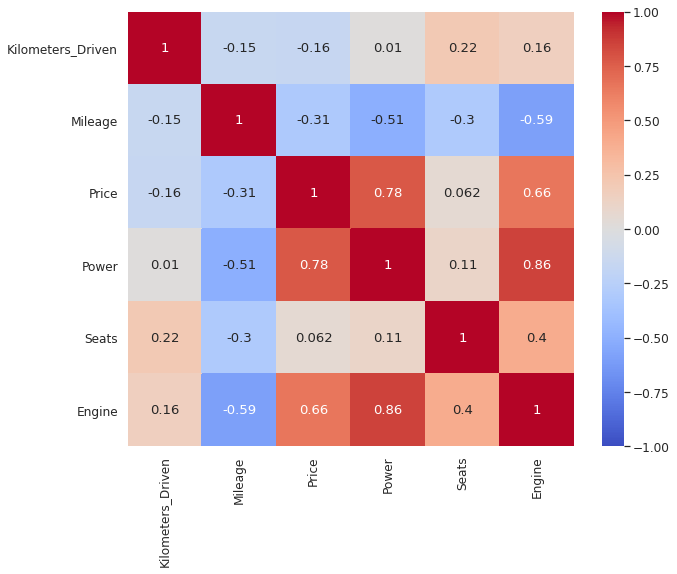

In [37]:
#correlation matrix for numerical variables
# Drop non-numerical variables
numerical = list(set(data_train.columns) - 
                 set(['Location', 'Year', 'Fuel_Type', 
                      'Transmission', 'Owner_Type', 'Brand','Model']))

# Calculate and plot with annotated correlation
corr_matrix = data_train[numerical].corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, vmin=-1,
            cmap='coolwarm',
            annot=True);

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3672: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


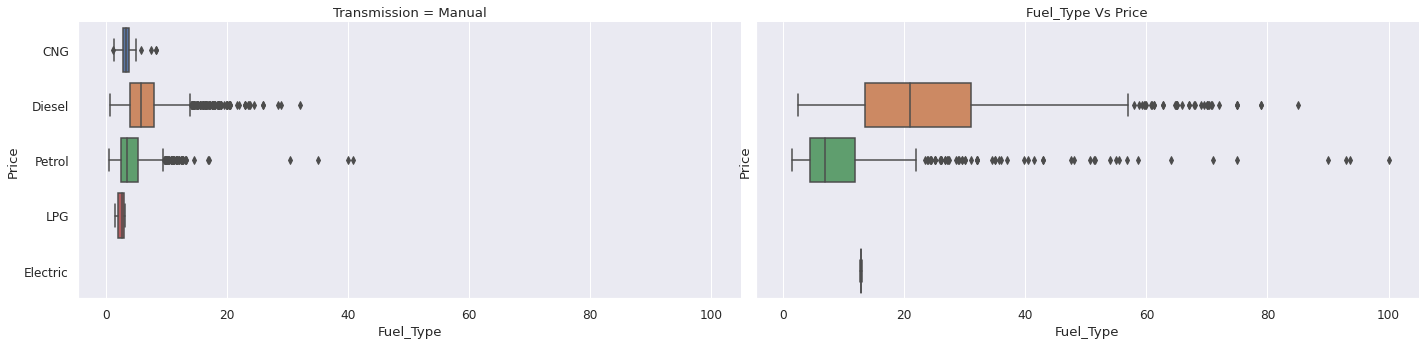

In [38]:
mx = sns.factorplot(y="Fuel_Type", x="Price", data=data_train, col='Transmission',kind="box", size=5 ,aspect=2)
mx.set(xlabel='Fuel_Type')
mx.set(ylabel= 'Price')
plt.title('Fuel_Type Vs Price');
plt.show()

In [0]:
data_train =data_train.drop(data_train.loc[(data_train['Fuel_Type']=='Electric') ].index.tolist()).reset_index(drop=True)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3672: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


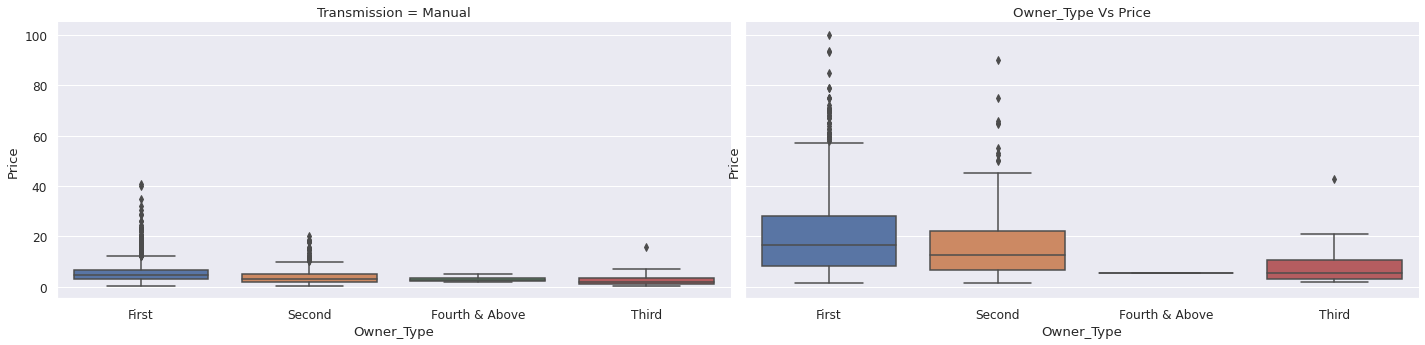

In [40]:
mx = sns.factorplot(x="Owner_Type", y="Price", data=data_train, kind="box",col='Transmission', size=5 ,aspect=2)
mx.set(xlabel='Owner_Type')
mx.set(ylabel= 'Price')
plt.title('Owner_Type Vs Price');
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3672: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


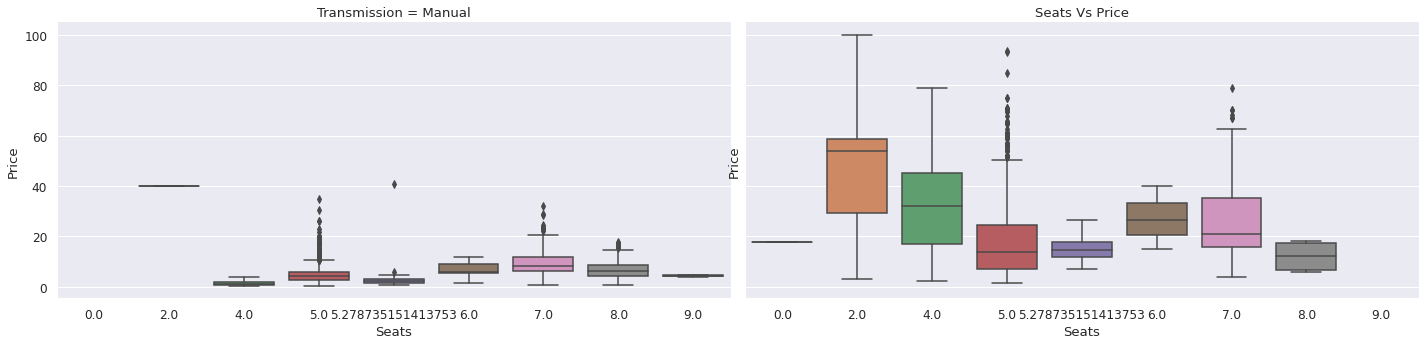

In [41]:
mx = sns.factorplot(x="Seats", y="Price", data=data_train, kind="box",col='Transmission', size=5 ,aspect=2)
mx.set(xlabel='Seats')
mx.set(ylabel= 'Price')
plt.title('Seats Vs Price');
plt.show()

In [42]:
plt.figure(figsize =(8,8))
plt.title('Feature Correlation Heat Map')
sns.heatmap(data_train.corr(),linewidths=.1,vmax=1.0,
            square=True,linecolor='',annot=True)

/usr/local/lib/python3.6/dist-packages/seaborn/matrix.py:302: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  cmap=self.cmap, **kws)


SystemError: ignored

SystemError: ignored

<Figure size 576x576 with 2 Axes>

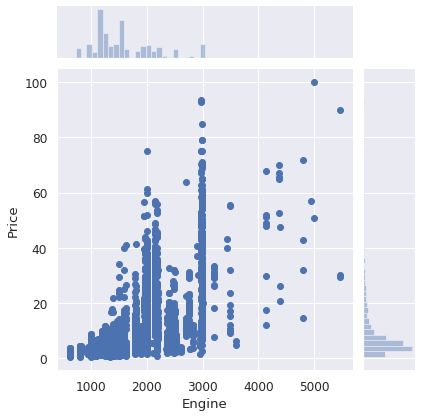

In [43]:
sns.jointplot(x='Engine', y='Price', 
              data=data_train, kind='scatter');

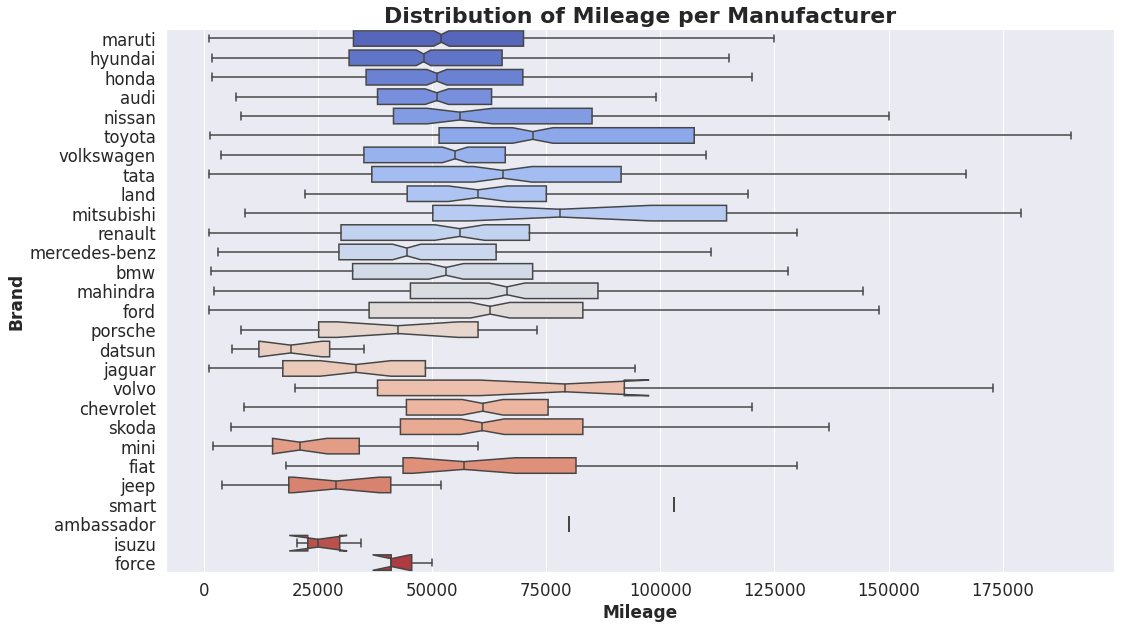

In [44]:
sns.set(font_scale = 1.5)
plt.figure(figsize=(17, 10));
plot = sns.boxplot(x='Kilometers_Driven',y='Brand',data=data_train,notch=True,orient='h',palette="coolwarm",showfliers=False)
plt.xlabel('Mileage',fontsize=17,fontweight="bold")
plt.ylabel('Brand',fontsize=17,fontweight="bold")
plt.title('Distribution of Mileage per Manufacturer',fontsize=22,fontweight="bold")
plt.xlim()
plt.show()

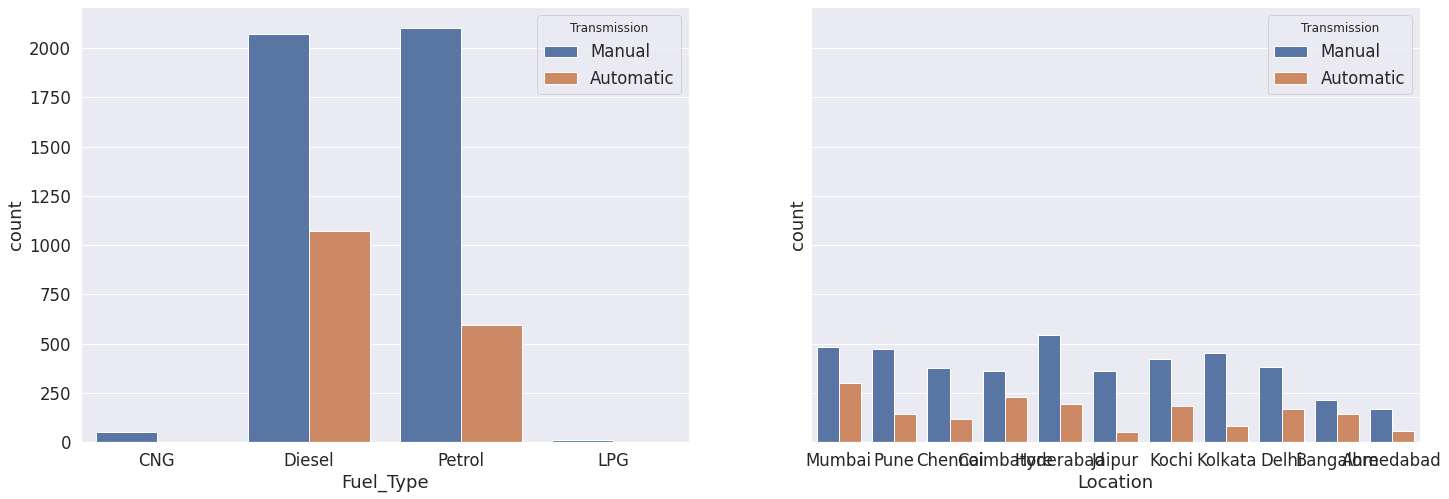

In [45]:
_, axes = plt.subplots(1, 2, sharey=True, figsize=(24, 8))

sns.countplot(x='Fuel_Type', hue='Transmission', data=data_train, ax=axes[0]);
sns.countplot(x='Location', hue='Transmission', data=data_train, ax=axes[1]);

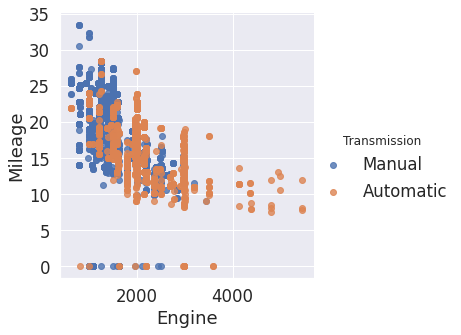

In [46]:
sns.lmplot('Engine', 'Mileage', data=data_train, hue='Transmission', fit_reg=False);

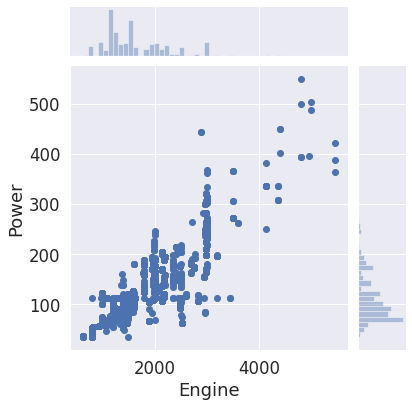

In [47]:
sns.jointplot(x='Engine', y='Power', 
              data=data_train, kind='scatter');

In [48]:
pd.crosstab(data_train['Brand'], data_train['Transmission']).T

Brand,ambassador,audi,bmw,chevrolet,datsun,fiat,force,ford,honda,hyundai,isuzu,jaguar,jeep,land,mahindra,maruti,mercedes-benz,mini,mitsubishi,nissan,porsche,renault,skoda,smart,tata,toyota,volkswagen,volvo
Transmission,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Automatic,0,234,263,9,0,0,0,36,128,145,1,40,1,54,26,94,289,24,5,12,16,18,92,1,9,92,59,20
Manual,1,0,0,111,13,28,3,257,474,943,2,0,13,1,242,1093,18,1,21,79,1,123,79,0,171,303,255,1


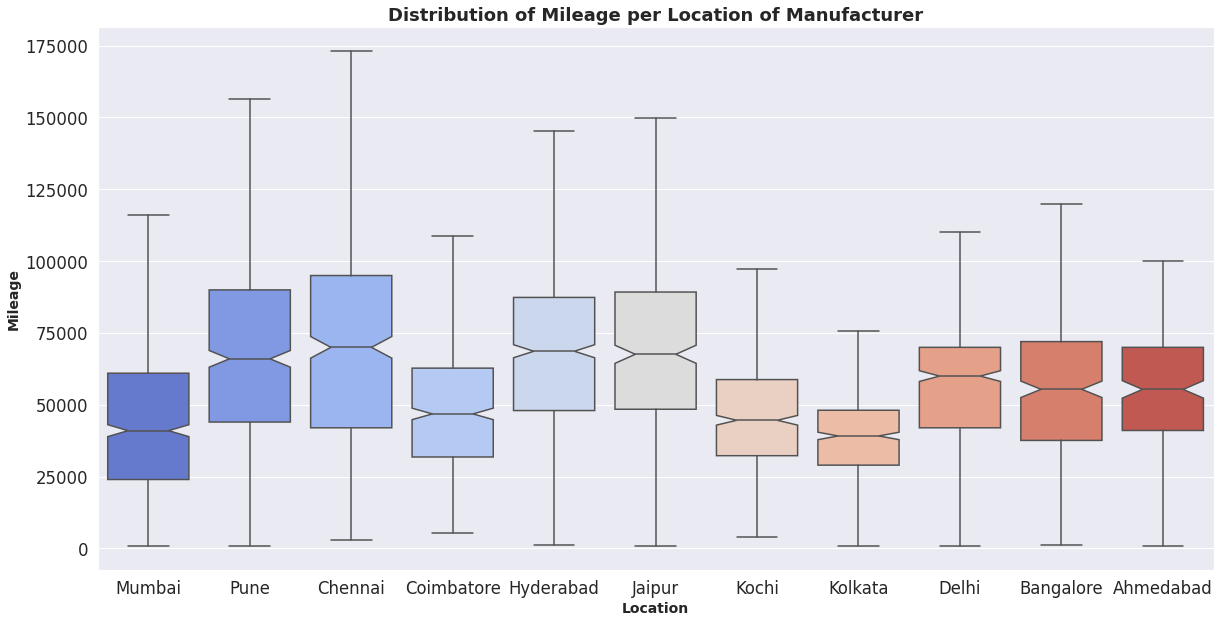

In [49]:
plt.figure(figsize=(20, 10));
sns.boxplot(x='Location',y='Kilometers_Driven',data=data_train,notch=True,palette="coolwarm",showfliers=False)
plt.xlabel('Location',fontsize=14,fontweight="bold")
plt.ylabel('Mileage',fontsize=14,fontweight="bold")
plt.title('Distribution of Mileage per Location of Manufacturer',fontsize=18,fontweight="bold")
plt.xlim()
plt.show()

In [51]:
data_train['Year'] = data_train['Year'].apply(lambda x : 2020 - x)
data_train.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand,Model
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75,maruti,wagon
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50,hyundai,creta
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50,honda,jazz
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00,maruti,ertiga
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74,audi,a4


# Data Splitting

We will be splitting the data and making dummy variables of all the categorical variables.

In [52]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5901 entries, 0 to 5900
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               5901 non-null   object 
 1   Location           5901 non-null   object 
 2   Year               5901 non-null   int64  
 3   Kilometers_Driven  5901 non-null   int64  
 4   Fuel_Type          5901 non-null   object 
 5   Transmission       5901 non-null   object 
 6   Owner_Type         5901 non-null   object 
 7   Mileage            5901 non-null   float64
 8   Engine             5901 non-null   float64
 9   Power              5901 non-null   float64
 10  Seats              5901 non-null   float64
 11  Price              5901 non-null   float64
 12  Brand              5901 non-null   object 
 13  Model              5901 non-null   object 
dtypes: float64(5), int64(2), object(7)
memory usage: 645.5+ KB


In [0]:
span_X = data_train[['Brand','Model','Year','Owner_Type','Fuel_Type','Power','Transmission','Kilometers_Driven','Location','Mileage','Engine','Seats']]
le_features = data_train[['Power','Year','Kilometers_Driven','Mileage','Engine','Seats']]
# Dummy Categorical Variables 
span_X = pd.concat([span_X,pd.get_dummies(span_X['Brand'],drop_first=True,prefix="Name")],axis=1) 
span_X= pd.concat([span_X,pd.get_dummies(span_X['Model'],drop_first=True,prefix="Model")],axis=1)
span_X = pd.concat([span_X,pd.get_dummies(span_X['Owner_Type'],drop_first=True,prefix="Owner")],axis=1)
span_X = pd.concat([span_X,pd.get_dummies(span_X['Fuel_Type'],drop_first=True,prefix="Fuel")],axis=1) 
span_X= pd.concat([span_X,pd.get_dummies(span_X['Location'],drop_first=True,prefix="Location")],axis=1)
span_X= pd.concat([span_X,pd.get_dummies(span_X['Transmission'],drop_first=True,prefix="Transmission")],axis=1)                     
# Remove categorical variable columns 
data_train_final = span_X.drop(columns=['Brand','Model','Owner_Type','Fuel_Type','Location','Transmission']) 
data_trainX = span_X.drop(columns=['Owner_Type','Fuel_Type','Location','Transmission'])

In [0]:
span_y = data_test[['Brand','Model','Year','Owner_Type','Fuel_Type','Power','Transmission','Kilometers_Driven','Location','Mileage','Engine','Seats']]
# Dummy Categorical Variables 
span_y = pd.concat([span_y,pd.get_dummies(span_y['Brand'],drop_first=True,prefix="Name")],axis=1) 
span_y= pd.concat([span_y,pd.get_dummies(span_y['Model'],drop_first=True,prefix="Model")],axis=1)
span_y = pd.concat([span_y,pd.get_dummies(span_y['Owner_Type'],drop_first=True,prefix="Owner")],axis=1)
span_y = pd.concat([span_y,pd.get_dummies(span_y['Fuel_Type'],drop_first=True,prefix="Fuel")],axis=1) 
span_y= pd.concat([span_y,pd.get_dummies(span_y['Location'],drop_first=True,prefix="Location")],axis=1)
span_y= pd.concat([span_y,pd.get_dummies(span_y['Transmission'],drop_first=True,prefix="Transmission")],axis=1) 
data_test_final= span_y.drop(columns=['Brand','Model','Owner_Type','Fuel_Type','Location','Transmission']) 

In [55]:
data_test_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1211 entries, 0 to 1233
Columns: 203 entries, Year to Transmission_Manual
dtypes: float64(3), int64(2), object(1), uint8(197)
memory usage: 299.2+ KB


In [56]:
data_train_target = data_train['Price']
data_train_final.head()

,Year,Power,Kilometers_Driven,Mileage,Engine,Seats,Name_audi,Name_bmw,Name_chevrolet,Name_datsun,Name_fiat,Name_force,Name_ford,Name_honda,Name_hyundai,Name_isuzu,Name_jaguar,Name_jeep,Name_land,Name_mahindra,Name_maruti,Name_mercedes-benz,Name_mini,Name_mitsubishi,Name_nissan,Name_porsche,Name_renault,Name_skoda,Name_smart,Name_tata,Name_toyota,Name_volkswagen,Name_volvo,Model_1000,Model_3,Model_5,Model_6,Model_7,Model_800,Model_a,...,Model_versa,Model_vitara,Model_wagon,Model_wrv,Model_x-trail,Model_x1,Model_x3,Model_x5,Model_x6,Model_xc60,Model_xc90,Model_xcent,Model_xe,Model_xenon,Model_xf,Model_xj,Model_xuv300,Model_xuv500,Model_xylo,Model_yeti,Model_z4,Model_zen,Model_zest,Owner_Fourth & Above,Owner_Second,Owner_Third,Fuel_Diesel,Fuel_LPG,Fuel_Petrol,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Transmission_Manual
0,2010,58.16,72000,26.60,998.0,5.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
1,2015,126.20,41000,19.67,1582.0,5.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1
2,2011,88.70,46000,18.20,1199.0,5.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1
3,2012,88.76,87000,20.77,1248.0,7.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1
4,2013,140.80,40670,15.20,1968.0,5.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0


In [0]:
X_train, X_test, y_train, y_test = train_test_split(data_train_final, data_train_target, test_size = 0.33,random_state=42)

In [58]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3953 entries, 3922 to 860
Columns: 255 entries, Year to Transmission_Manual
dtypes: float64(4), int64(2), uint8(249)
memory usage: 1.1 MB


In [59]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((3953, 255), (3953,), (1948, 255), (1948,))

## Part 4 - Machine Learning Models
In this section, I test out 3 different regression models on my dataset. 

* For the Decision tree Regressor and the KNN regressor, I just test out a range of values for the max_depth and number of neighbors and plot out the scores for the train/test values. I select the hyperparameter that don't result in overfitting and that return a good score on the test set. (small differences between training and testing sets --> better at generalizing) (essentially finding the right bias variance tradeoff)
* For the Random Forest Regressor, I optimized the hyperparameters using a randomized search cross validation and each took about one to two days to run. 
* Metrics: I use the R-Squared to determine which model I will use for deployment. I also use the Root Mean Squared error as it reflects the units of the outcome variable (price).

# Model 1: Decision Tree Regressor

The Score on the test set with a basic decision tree regressor is: 0.7312004694599905
The Root Mean squared error with a basic decision tree regressor: 5.30


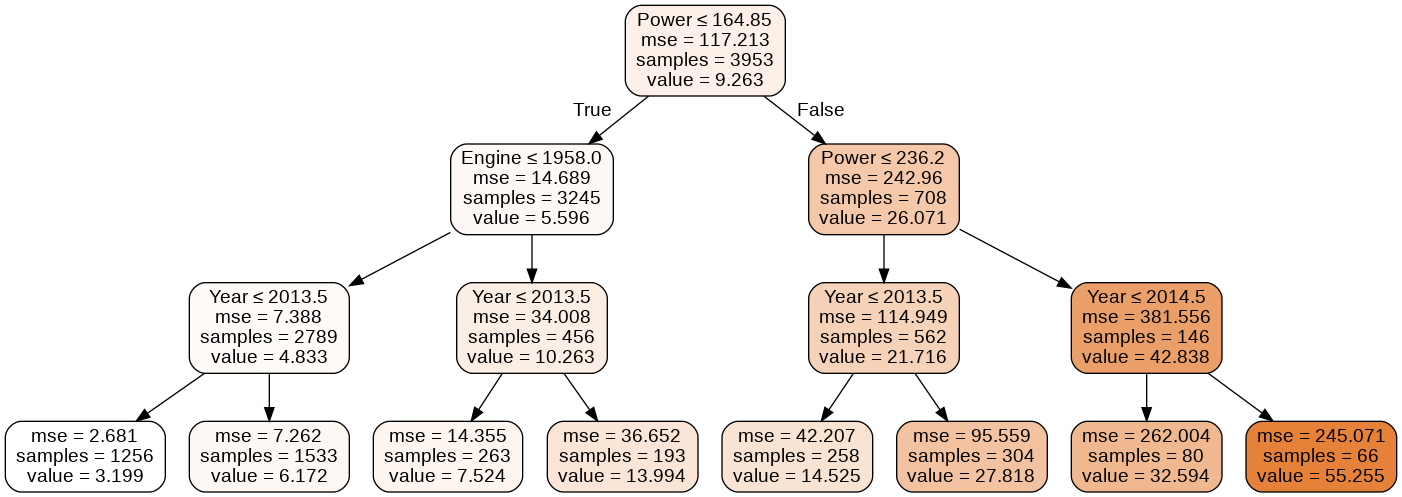

In [61]:
from sklearn.metrics import mean_squared_error

D_T = tree.DecisionTreeRegressor(max_depth=3)
D_T.fit(X_train, y_train)
y_pred_dt = D_T.predict(X_test)
print('The Score on the test set with a basic decision tree regressor is:',D_T.score(X_test,y_test))
print("The Root Mean squared error with a basic decision tree regressor: %.2f"
      % np.sqrt(mean_squared_error(y_test, y_pred_dt)))

dot_data = StringIO()
export_graphviz(D_T, out_file=dot_data,feature_names=data_train_final.columns,
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [0]:
trknn_scores=[]
teknn_scores= []
rmse_scores=[]
for i in np.arange(1,20,1):
    D_T = tree.DecisionTreeRegressor(max_depth=i,random_state=42)
    D_T.fit(X_train, y_train)
    y_pred_dt = D_T.predict(X_test)
    train_scores = D_T.score(X_train,y_train)
    test_scores = D_T.score(X_test,y_test)
    # The Root mean squared error
    trknn_scores.append(train_scores)
    teknn_scores.append(test_scores)
    rmse_scores.append(np.sqrt(mean_squared_error(y_test, y_pred_dt)))

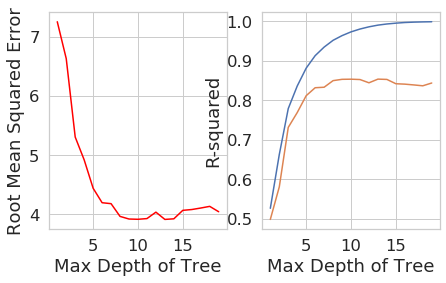

In [0]:
sns.set_style('whitegrid')
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(7,4));
ax1.plot(np.arange(1,20,1),rmse_scores,color='red');
ax2.plot(np.arange(1,20,1),trknn_scores);
ax2.plot(np.arange(1,20,1),teknn_scores);
ax1.set_xlabel('Max Depth of Tree')
ax2.set_xlabel('Max Depth of Tree')
ax1.set_ylabel('Root Mean Squared Error')
ax2.set_ylabel('R-squared');

In [0]:
from sklearn import tree
from sklearn.metrics import mean_squared_error

D_T = tree.DecisionTreeRegressor(max_depth=8,random_state=42)
D_T.fit(X_train, y_train)
y_pred_dt = D_T.predict(X_test)
print('The Score on the training set with a decision tree regressor is:',D_T.score(X_train,y_train))
print('The Score on the test set with a decision tree regressor is:',D_T.score(X_test,y_test))
print("Mean squared error: %.2f"
      % np.sqrt(mean_squared_error(y_test, y_pred_dt)))

The Score on the training set with a decision tree regressor is: 0.9522094927373272
The Score on the test set with a decision tree regressor is: 0.8498437667433347
Mean squared error: 3.96


# Model 2: KNN Model

In [0]:
KNR = KNeighborsRegressor()

trknn_scores=[]
teknn_scores= []
rmse_scores=[]

for i in np.arange(1,100,5):
    KNR = KNeighborsRegressor(n_neighbors=i)
    KNR.fit(X_train,y_train)
    KNR.score(X_test,y_test)
    train_scores = KNR.score(X_train,y_train)
    test_scores = KNR.score(X_test,y_test)
    
# The Root mean squared error
    
    trknn_scores.append(train_scores)
    teknn_scores.append(test_scores)
    y_pred_knn = KNR.predict(X_test)
    rmse_scores.append(np.sqrt(mean_squared_error(y_test, y_pred_knn)))

Text(0, 0.5, 'R-squared')

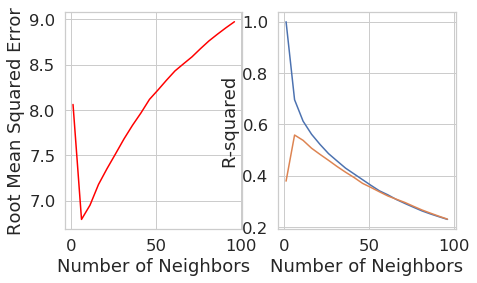

In [0]:
sns.set_style('whitegrid')
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(7,4))
ax1.plot(np.arange(1,100,5),rmse_scores,color='red')
ax2.plot(np.arange(1,100,5),trknn_scores)
ax2.plot(np.arange(1,100,5),teknn_scores)
ax1.set_xlabel('Number of Neighbors')
ax2.set_xlabel('Number of Neighbors')
ax1.set_ylabel('Root Mean Squared Error')
ax2.set_ylabel('R-squared')

In [0]:
KNR = KNeighborsRegressor(n_neighbors=15)
KNR.fit(X_train,y_train)
y_pred_KNR = KNR.predict(X_test)
print('The Score on the test set with a KNN regressor is:',KNR.score(X_test,y_test))
print("Mean squared error: %.2f"
      % np.sqrt(mean_squared_error(y_test, y_pred_KNR)))

The Score on the test set with a KNN regressor is: 0.5131079360201336
Mean squared error: 7.14


# Model 3: Random Forest Regressor Model

In [0]:
from sklearn.ensemble import RandomForestRegressor

rand_est = RandomForestRegressor()
rand_est.fit(X_train,y_train)
y_pred = rand_est.predict(X_test)
print(' The Score on the test set with a random forest regressor is:', rand_est.score(X_test,y_test))
print("Mean squared error: %.2f"
      % np.sqrt(mean_squared_error(y_test, y_pred)))
print("Accuracy :",rand_est.score(X_test,y_test)*100,'%')

 The Score on the test set with a random forest regressor is: 0.9097167490146538
Mean squared error: 3.07
Accuracy : 90.97167490146538 %


In [0]:
RFR = RandomForestRegressor()

n_estimators = [1 , 2 , 4, 8 , 16, 32, 64, 100, 200]

max_features = ['auto', 'sqrt']

max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

min_samples_split = [2, 5, 10]

min_samples_leaf = [1, 2, 4]

bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
rf_random = RandomizedSearchCV(estimator = RFR, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)

best_model = rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   11.1s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   42.7s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  1.5min finished


In [0]:
best_model

RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [0]:
best_model.best_params_

{'n_estimators': 200,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 20,
 'bootstrap': True}

In [0]:
from sklearn.ensemble import RandomForestRegressor

rand_est = RandomForestRegressor(max_depth=20, n_estimators= 200, min_samples_split= 5, min_samples_leaf= 1, bootstrap= True, max_features= 'auto')
rand_est.fit(X_train,y_train)
y_pred_rfr = rand_est.predict(X_test)
print(' The Score on the train set with a hyperparameter optimized random forest regressor is:',rand_est.score(X_train,y_train))
print(' The Score on the test set with a hyperparameter optimized random forest regressor is:',rand_est.score(X_test,y_test))
print("Mean squared error: %.2f"
      % np.sqrt(mean_squared_error(y_test, y_pred_rfr)))

 The Score on the train set with a hyperparameter optimized random forest regressor is: 0.984268038906707
 The Score on the test set with a hyperparameter optimized random forest regressor is: 0.9074389475540754
Mean squared error: 3.11


# Model 4: Linear regression

In [0]:
linearRegression = LinearRegression()
linearRegression.fit(X_train, y_train)
y_pred = linearRegression.predict(X_test)
r2_score(y_test, y_pred)

0.8255616095682929

# Submitting the Model And The Prediction

In [0]:
data_test.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Brand,Model
0,Maruti Alto K10 LXI CNG,Delhi,2014,40929,CNG,Manual,First,32.26,998.0,58.20000,4.0,maruti,alto
1,Maruti Alto 800 2016-2019 LXI,Coimbatore,2013,54493,Petrol,Manual,Second,24.7,796.0,47.30000,5.0,maruti,alto
2,Toyota Innova Crysta Touring Sport 2.4 MT,Mumbai,2017,34000,Diesel,Manual,First,13.68,2393.0,147.80000,7.0,toyota,innova
3,Toyota Etios Liva GD,Hyderabad,2012,139000,Diesel,Manual,First,23.59,1364.0,110.38042,5.0,toyota,etios
4,Hyundai i20 Magna,Mumbai,2014,29000,Petrol,Manual,First,18.5,1197.0,82.85000,5.0,hyundai,i20


In [0]:
data_test_final.head()

,Year,Power,Kilometers_Driven,Mileage,Engine,Seats,Name_bmw,Name_chevrolet,Name_datsun,Name_fiat,...,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Transmission_Manual
0,2014,58.20000,40929,32.26,998.0,4.0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,2013,47.30000,54493,24.7,796.0,5.0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
2,2017,147.80000,34000,13.68,2393.0,7.0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
3,2012,110.38042,139000,23.59,1364.0,5.0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
4,2014,82.85000,29000,18.5,1197.0,5.0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1


In [0]:
data_test_final['Brand']= data_test['Brand']


In [0]:
import pickle 
  
# Save the trained model as a pickle string. 
saved_model = pickle.dumps(D_T) 
# Load the pickled model 
D_T_from_pickle = pickle.loads(saved_model) 
# Use the loaded pickled model to make predictions 
Prediction_1=D_T_from_pickle.predict(data_test2.values) 

# Save the trained model as a pickle string. 
saved_model2 = pickle.dumps(rand_est) 
# Load the pickled model 
rand_est_from_pickle = pickle.loads(saved_model2) 
# Use the loaded pickled model to make predictions 
Prediction_2=rand_est_from_pickle.predict(data_test2.values)

In [0]:
prediction1=pd.DataFrame(Prediction_1)
prediction1

In [0]:
prediction2=pd.DataFrame(Prediction_2)
prediction2

In [0]:
final_data['pred1_randforest'] = prediction2
final_data.to_csv('D:\data1.csv')

In [0]:
final_data